In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

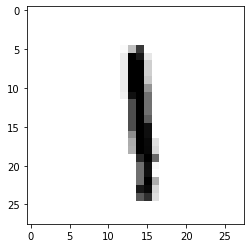

In [3]:
plt.imshow(x_train[8], cmap=plt.cm.binary)

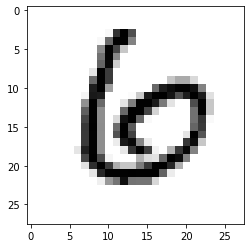

In [4]:
#Proxima Prediccion
plt.imshow(x_test[11], cmap=plt.cm.binary)

In [5]:
#Etiqeta o label correspondiente al dato que se encuentra en el set de entrenamiento
print(y_train[8])

1


In [6]:
#Números de ejes del set de entrenamiento
print(x_train.ndim)

3


In [6]:
#Forma del set de entrenamiento
print(x_train.shape)

(60000, 28, 28)


In [7]:
#Que tipos de datos contiene nuestro set de entrenamiento
print(x_train.dtype)

uint8


In [8]:
#En resumen, x_train es un tensor 3D de entero de 8 bits.
#Más concretamente, se trata de un vector de 60000 matrices 2D de 28*28 enteros.
#Cada una de esas matrices es una imagen en escala de grises, con coeficientes entre 0 y 255.

In [7]:
my_slice = x_train[1:100:,:]
print(my_slice.shape)

(99, 28, 28)


In [8]:
my_slice = x_train[1:100:,0:28,0:28]
print(my_slice.shape)

(99, 28, 28)


In [9]:
my_slice = x_train[:,14:,14:]
print(my_slice.shape)

(60000, 14, 14)


In [10]:
my_slice = x_train[:,7:-7,7:-7]
print(my_slice.shape)

(60000, 14, 14)


## Preprocesado de Datos

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [12]:
x_train /= 255
x_test /= 255

In [13]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [14]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## One Hot

In [15]:
from tensorflow.keras.utils import to_categorical

In [18]:
#Antes
print(y_test[0])

7


In [19]:
print(y_train[0])

5


In [20]:
print(y_train.shape)

(60000,)


In [21]:
print(x_test.shape)

(10000, 784)


In [16]:
#Aplicación One-Hot
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [23]:
print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [24]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [25]:
print(y_train.shape)

(60000, 10)


In [26]:
print(y_test.shape)

(10000, 10)


## Definición del Modelo

In [17]:
from keras.models import Sequential
from keras.layers import Activation, Dense

In [18]:
model = Sequential()
model.add(Dense(10, activation = 'sigmoid', input_shape = (784,)))
model.add(Dense(10, activation = 'softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


## Configuración del proceso de aprendizaje

In [20]:
model.compile(loss="categorical_crossentropy",
              optimizer = "sgd",
              metrics = ['accuracy'])

## Entrenamiento del modelo

In [21]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 1ms/step - loss: 2.1446 - accuracy: 0.3589
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.4835 - accuracy: 0.7028
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0524 - accuracy: 0.7898
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8288 - accuracy: 0.8235
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6983 - accuracy: 0.8407


## Evaluación del modelo

In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.6168 - accuracy: 0.8599


In [23]:
print("Precisión del Testing", round(test_acc *100,3))

Precisión del Testing 85.99


## Generación de predicciones

In [24]:
predictions = model.predict(x_test)

In [29]:
np.argmax(predictions[11])

6

In [30]:
print(predictions[11])

[0.07836822 0.05497058 0.11215614 0.01644351 0.06962407 0.04092384
 0.5455341  0.00505021 0.067072   0.00985727]


In [31]:
np.sum(predictions[11])

0.9999999